In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
import nsetools
nse = nsetools.Nse()
PC = "previousClose"
O = "open"
H = "dayHigh"
L = "dayLow"
C = "closePrice"
LTP = "lastPrice"
H52 = "high52"
L52 = "low52"
NAME = "companyName"

In [22]:
symbol = "star"
quote = nse.get_quote(symbol)

In [23]:
print("Open:\t",quote[O])
print("Close:\t",quote[C])
print("High:\t",quote[H])
print("52wHi:\t",quote[H52])
print("Low:\t",quote[L])
print("52wLo:\t",quote[L52])
print("LTP:\t",quote[LTP])

Open:	 490.85
Close:	 0.0
High:	 495.15
52wHi:	 1041.1
Low:	 489.15
52wLo:	 333.3
LTP:	 494.15


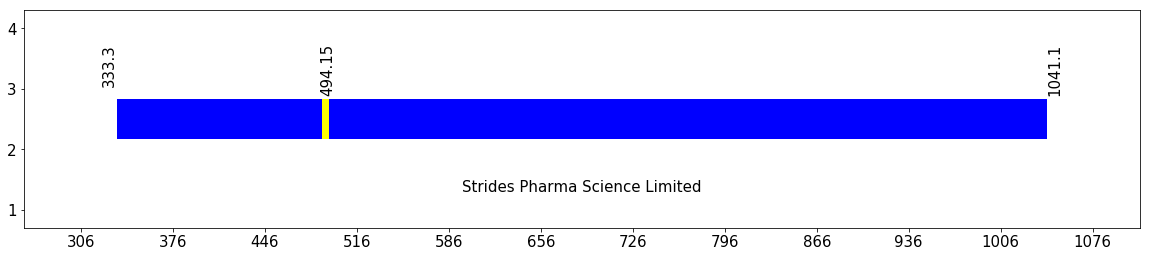

In [24]:
def plot_stock(L52, H52,L,H,LTP, NAME):
    plt.rcParams["font.size"] = 15
    plt.rcParams["figure.figsize"]  = [20,4]
    plt.vlines(x = L52, ymin=1, ymax=4, linewidth=1, color = 'white')
    plt.plot([L52, H52], [2.5, 2.5], lw=40, color="blue", solid_capstyle="butt")
    plt.plot([L, H], [2.5, 2.5], lw=40, color="yellow", solid_capstyle="butt")
    plt.plot([LTP, LTP+0.05], [2.5, 2.5], lw=40, color="black", solid_capstyle="butt")
    plt.yticks(range(5))
    plt.xticks(range(int(0.5*L52), int(H52+0.5*L52), int((H52-L52)/10)))
    plt.text(LTP, 3.75, LTP,rotation=90,horizontalalignment = "center", verticalalignment = "top")
    plt.text(L52, 3.75, L52, rotation=90,horizontalalignment = "right", verticalalignment = "top")
    plt.text(H52, 3.75, H52, rotation=90,horizontalalignment = "left", verticalalignment = "top")
    plt.text(L52 + (H52-L52)/2, 1.5, NAME, horizontalalignment = "center", verticalalignment = "top")
    plt.margins(0.1)
    plt.show()

plot_stock(quote[L52], quote[H52], quote[L], quote[H], quote[LTP], quote[NAME])

In [25]:
import math
class Intrade:
    def __init__(self,qty,buyp,sellp, margin = 1):
        self.margin = margin
        self.qty = qty
        self.buyp = buyp
        self.sellp = sellp
        self.btotal = round(qty * buyp, 2)
        self.stotal = round(qty * sellp, 2)
        self.bbrokerage = round(min( 0.0001 * qty * buyp, 20),2)
        self.sbrokerage = round(min( 0.0001 * qty * sellp, 20),2)
        self.brokerage = round(self.bbrokerage + self.sbrokerage,2)
        self.stt = math.ceil(0.00025 * qty * sellp)
        self.xtch = round(0.00325 * 0.01 * qty * ( buyp + sellp ),2)
        self.gst = round(0.18 * (self.brokerage + self.xtch),2)
        self.sebich = round(0.0000015 * qty * (buyp + sellp),2)
        self.sd = round(0.00006 * qty*(buyp+sellp),2)
        self.totalcharges = round(self.brokerage + self.stt + self.xtch + self.gst + self.sebich + self.sd ,2)
        self.totalcost = round((qty * buyp)/margin + self.totalcharges,2)
        self.net_pl = round(qty * (sellp - buyp) - self.totalcharges,2)
        self.gross_pl =  round(qty * (sellp - buyp),2)
        
        

In [26]:
import numpy as np

In [27]:
def long_pl(buyp,qty):    
    gross = []
    net = []
    sp = []
    for i in np.arange(buyp-10,buyp+10,0.05):
        sp.append(i)
        gross.append(Intrade(qty,buyp,i).gross_pl)
        net.append(Intrade(qty,buyp,i).net_pl)
    sp =  np.array(sp)
    gross = np.array(gross)
    net = np.array(net)
    bep = round(sp[np.argwhere(net >= 0)[0]][0],2)
    print("BEP\t:", bep, "\tNet : ",Intrade(qty,buyp,bep).net_pl)
    p10 = round(sp[np.argwhere(net >= 10)[0]][0],2)
    print("10 Rs\t:", p10, "\tNet : ",Intrade(qty,buyp,p10).net_pl)
    p20 = round(sp[np.argwhere(net >= 20)[0]][0],2)
    print("20 Rs\t:", p20, "\tNet : ",Intrade(qty,buyp,p20).net_pl)
    
def short_pl(sellp,qty):    
    gross = []
    net = []
    bp = []
    for i in np.arange(sellp-10,sellp+10,0.05):
        bp.append(i)
        gross.append(Intrade(qty,i,sellp).gross_pl)
        net.append(Intrade(qty,i,sellp).net_pl)
    bp =  np.array(bp)
    gross = np.array(gross)
    net = np.array(net)
    bep = round(bp[np.argwhere(net >= 0)[-1]][0],2)
    print("BEP\t:", bep, "\tNet : ",Intrade(qty,bep,sellp).net_pl)
    p10 = round(bp[np.argwhere(net >= 10)[-1]][0],2)
    print("10 Rs\t:", p10, "\tNet : ",Intrade(qty,p10,sellp).net_pl)
    p20 = round(bp[np.argwhere(net >= 20)[-1]][0],2)
    print("20 Rs\t:", p20, "\tNet : ",Intrade(qty,p20,sellp).net_pl)

In [28]:
short_pl(174.40,150)


BEP	: 174.25 	Net :  4.1
10 Rs	: 174.2 	Net :  11.6
20 Rs	: 174.1 	Net :  26.6


In [29]:
long_pl(1232,100)

BEP	: 1232.85 	Net :  0.3
10 Rs	: 1232.95 	Net :  10.3
20 Rs	: 1233.05 	Net :  20.3


In [12]:
import numpy as np

In [13]:
def PLContour(buyp):
    sp = np.arange(buyp-5, buyp+5, 0.05)
    qty = np.arange(1,250,1)
    SP , QT = np.meshgrid(sp,qty)
    LP = []
    for i in qty:
        for j in sp:
            LP.append(Intrade(i,buyp,j).net_pl)
    LP = np.array(LP)
    LP = np.reshape(LP,(qty.size, sp.size))
    #plt.contourf(QT,SP,LP)
    #plt.show()
    plt.figure(figsize=(20, 10))
    plt.hlines(y=buyp+0.5, xmin=1, xmax=250, linewidth=1, color = 'k')
    plt.hlines(y=buyp+1, xmin=1, xmax=250, linewidth=1, color = 'k')
    plt.hlines(y=buyp+1.5, xmin=1, xmax=250, linewidth=1, color = 'k')
    plt.hlines(y=buyp, xmin=1, xmax=250, linewidth=1, color = 'k')
    plt.hlines(y=buyp-0.5, xmin=1, xmax=250, linewidth=1, color = 'k')
    plt.hlines(y=buyp-1, xmin=1, xmax=250, linewidth=1, color = 'k')
    plt.hlines(y=buyp-1.5, xmin=1, xmax=250, linewidth=1, color = 'k')
    levels = np.arange(-1000,1000,100)
    CS = plt.contour(QT,SP,LP, levels =levels)
    plt.clabel(CS, inline=1, fontsize=10)


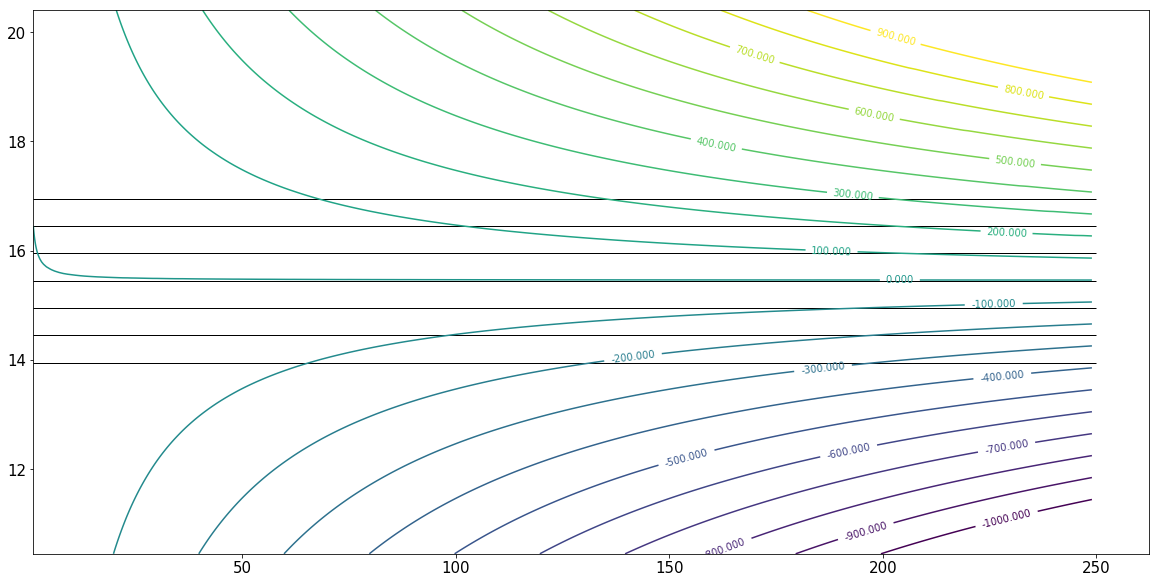

In [14]:
PLContour(15.45)

In [15]:
sps = np.arange(90,99,0.05)
qtys = np.arange(1,250,1)
SP , QT = np.meshgrid(sps, qtys)
SP * QT

array([[   90.  ,    90.05,    90.1 , ...,    98.85,    98.9 ,    98.95],
       [  180.  ,   180.1 ,   180.2 , ...,   197.7 ,   197.8 ,   197.9 ],
       [  270.  ,   270.15,   270.3 , ...,   296.55,   296.7 ,   296.85],
       ...,
       [22230.  , 22242.35, 22254.7 , ..., 24415.95, 24428.3 , 24440.65],
       [22320.  , 22332.4 , 22344.8 , ..., 24514.8 , 24527.2 , 24539.6 ],
       [22410.  , 22422.45, 22434.9 , ..., 24613.65, 24626.1 , 24638.55]])

In [16]:
x  = np.arange(1,5,1)
y = np.arange(25,30,1)
X,Y = np.meshgrid(x,y)
print(X)
print(Y)
x.size

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
[[25 25 25 25]
 [26 26 26 26]
 [27 27 27 27]
 [28 28 28 28]
 [29 29 29 29]]


4

In [17]:
LP = []
for i in x:
    for j in y:
        LP.append(Intrade(i,26.25,j).totalcharges)

In [18]:
lp = np.array(LP)
Z = np.reshape(lp,(5,4))

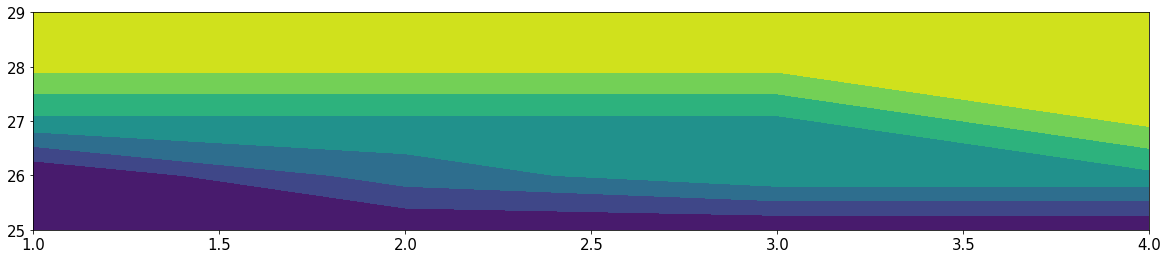

In [19]:
import matplotlib.pyplot as plt
plt.contourf(X,Y,Z)
plt.show()